In [3]:
# importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Reading dataset
df = pd.read_csv(r'C:\Users\Kiran\Desktop\Mental Illness Prediction\Patient_Characteristics_Survey__PCS___2019.csv'
                 , delimiter = ';') 

df.head(5)

,Survey Year,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,...,No Insurance,Unknown Insurance Coverage,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance,Criminal Justice Status,Three Digit Residence Zip Code
0,2019,OUTPATIENT,LONG ISLAND REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"YES, HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,False,YES,YES,NO,NO,NO,NO,NO,117
1,2019,OUTPATIENT,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,False,YES,YES,NO,NO,NO,NO,NO,100
2,2019,OUTPATIENT,HUDSON RIVER REGION,ADULT,MALE,"NO, NOT TRANSGENDER",LESBIAN OR GAY,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,False,YES,YES,NO,NO,NO,NO,NO,120
3,2019,RESIDENTIAL,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,UNKNOWN,OTHER,OTHER LIVING SITUATION,...,NO,False,YES,NO,NO,NO,NO,NO,NO,114
4,2019,OUTPATIENT,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,False,YES,YES,NO,NO,NO,NO,NO,142


# Exploratory Data Analysis :

In [5]:
# list of all columns in df
print("Total rows and columns in df - ", df.shape), print("List of columns in df -",df.columns)

Total rows and columns in df -  (196102, 76)
List of columns in df - Index(['Survey Year', 'Program Category', 'Region Served', 'Age Group', 'Sex',
       'Transgender', 'Sexual Orientation', 'Hispanic Ethnicity', 'Race',
       'Living Situation', 'Household Composition', 'Preferred Language',
       'Religious Preference', 'Veteran Status', 'Employment Status',
       'Number Of Hours Worked Each Week', 'Education Status',
       'Special Education Services', 'Mental Illness',
       'Intellectual Disability', 'Autism Spectrum',
       'Other Developmental Disability', 'Alcohol Related Disorder',
       'Drug Substance Disorder', 'Opioid Related Disorder',
       'Mobility Impairment Disorder', 'Hearing Impairment',
       'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
       'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack', 'Stroke',
       'Other Cardiac', 'Pulmonary Asthma', 'Alzheimer or Dementia',
       'Kidney Disease', 'Liver Disease', 'Endocrine Cond

(None, None)

In [6]:
# checking all the null values in columns
df.info()
# Validated there are no null values in data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196102 entries, 0 to 196101
Data columns (total 76 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Survey Year                       196102 non-null  int64 
 1   Program Category                  196102 non-null  object
 2   Region Served                     196102 non-null  object
 3   Age Group                         196102 non-null  object
 4   Sex                               196102 non-null  object
 5   Transgender                       196102 non-null  object
 6   Sexual Orientation                196102 non-null  object
 7   Hispanic Ethnicity                196102 non-null  object
 8   Race                              196102 non-null  object
 9   Living Situation                  196102 non-null  object
 10  Household Composition             196102 non-null  object
 11  Preferred Language                196102 non-null  object
 12  Re

In [7]:
#Check if there is na values
print(df.isna().sum())
# Validated no na values in data  

Survey Year                       0
Program Category                  0
Region Served                     0
Age Group                         0
Sex                               0
                                 ..
Private Insurance                 0
Child Health Plus Insurance       0
Other Insurance                   0
Criminal Justice Status           0
Three Digit Residence Zip Code    0
Length: 76, dtype: int64


## Additional steps for Data understanding in detail

In [8]:
numeric_cols = []
alphabetic_cols = []
alphanumeric_cols = []

# Check if the column is numeric, alphabetic, or alphanumeric

for col in df.columns:
    series = df[col]
    if pd.api.types.is_numeric_dtype(series):
        numeric_cols.append(col)
    elif pd.api.types.is_string_dtype(series):
        if series.str.isalpha().all():
            alphabetic_cols.append(col)
        elif series.str.isalnum().all():
            alphanumeric_cols.append(col)

print("Numeric Columns:", numeric_cols)
print("Alphabetic Columns:", alphabetic_cols)
print("Alphanumeric Columns:", alphanumeric_cols)


Numeric Columns: ['Survey Year', 'Unknown Chronic Med Condition', 'Unknown Insurance Coverage', 'Three Digit Residence Zip Code']
Alphabetic Columns: ['Program Category', 'Age Group', 'Sex', 'Veteran Status', 'Mental Illness', 'Intellectual Disability', 'Autism Spectrum', 'Other Developmental Disability', 'Alcohol Related Disorder', 'Drug Substance Disorder', 'Opioid Related Disorder', 'Mobility Impairment Disorder', 'Hearing Impairment', 'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia', 'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack', 'Stroke', 'Other Cardiac', 'Pulmonary Asthma', 'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease', 'Endocrine Condition', 'Neurological Condition', 'Traumatic Brain Injury', 'Joint Disease', 'Cancer', 'Other Chronic Med Condition', 'No Chronic Med Condition', 'Cannabis Recreational Use', 'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Medication', 'Received Smoking Counseling', 'Serious Mental Illness', 'Alcohol 12m S

In [9]:
# There are no alphanumeric columns, only numeric and alphabetic columns
# 'Unknown Chronic Med Condition', 'Unknown Insurance Coverage' are boolean columns with values True/False
# We will convert them to Yes/No to make data categorical 

df['Unknown Chronic Med Condition'] = df['Unknown Chronic Med Condition'].map({True : 'YES', False : 'NO'})
df['Unknown Insurance Coverage'] = df['Unknown Insurance Coverage'].map({True : 'YES', False : 'NO'})

In [10]:
# check unique values in each column in df
for i in df.columns:
    print(f"{i} -  {df[i].unique()}")

Survey Year -  [2019]
Program Category -  ['OUTPATIENT' 'RESIDENTIAL' 'SUPPORT' 'INPATIENT' 'EMERGENCY']
Region Served -  ['LONG ISLAND REGION' 'NEW YORK CITY REGION' 'HUDSON RIVER REGION'
 'WESTERN REGION' 'CENTRAL NY REGION']
Age Group -  ['ADULT' 'CHILD' 'UNKNOWN']
Sex -  ['MALE' 'FEMALE' 'UNKNOWN']
Transgender -  ['NO, NOT TRANSGENDER' 'YES, TRANSGENDER' "CLIENT DIDN'T ANSWER" 'UNKNOWN']
Sexual Orientation -  ['STRAIGHT OR HETEROSEXUAL' 'LESBIAN OR GAY' 'OTHER' 'BISEXUAL'
 'CLIENT DID NOT ANSWER' 'UNKNOWN']
Hispanic Ethnicity -  ['YES, HISPANIC/LATINO' 'NO, NOT HISPANIC/LATINO' 'UNKNOWN']
Race -  ['WHITE ONLY' 'OTHER' 'BLACK ONLY' 'MULTI-RACIAL' 'UNKNOWN RACE']
Living Situation -  ['PRIVATE RESIDENCE' 'OTHER LIVING SITUATION' 'UNKNOWN'
 'INSTITUTIONAL SETTING']
Household Composition -  ['COHABITATES WITH OTHERS' 'LIVES ALONE' 'NOT APPLICABLE' 'UNKNOWN']
Preferred Language -  ['ENGLISH' 'SPANISH' 'INDO-EUROPEAN' 'AFRO-ASIATIC'
 'ASIAN AND PACIFIC ISLAND' 'UNKNOWN' 'ALL OTHER LANGUAG

 There are 76 columns in dataset. We went through the data dictionary and found that most of the columns have YES/NO/UNKNOWN values.

 Howerver, there are some columns which have more categories, if they are selected in feature engineering, encoding them will increase the cardinality for model training, risking overfitting of model and impacting model performance and execution time.
 
 We will look into those columns and try grouping the categories meaningfully so that data quality is maintained.

 Also, we need to check class imbalance in each of the column as well - before and after modifications, so that we can group reasonably to solve the predction probelm better.

In [11]:
# zip coe and year are not needed for analysis - we will drop them
# Drop columns B and D
df = df.drop(['Three Digit Residence Zip Code', 'Survey Year'], axis=1)

In [12]:
# Target variable analysis - 'mental_illness'
print (df['Mental Illness'].value_counts(normalize=True)  )

# Checking count of target variable
temp_df1 =df.groupby([  'Mental Illness' ]).agg(
    Count=('Age Group', 'count')
).reset_index()

print('Count - \n', temp_df1)

Mental Illness
YES        0.961438
NO         0.028439
UNKNOWN    0.010122
Name: proportion, dtype: float64
Count - 
   Mental Illness   Count
0             NO    5577
1        UNKNOWN    1985
2            YES  188540


In [13]:
# UNKNOWN(1.01%)) values in target variable 'mental_illness' need to be handled, we will drop them from dataset

# Remove rows with UNKNOWN target
df = df[df['Mental Illness'].isin(['YES', 'NO'])]


In [14]:
# "Program Category",	"Age Group",	"Sex",	"Transgender",	"Region Served",	"Sexual Orientation",	"Hispanic Ethnicity",	"Race",	"Living Situation",
# "Household Composition",	"Preferred Language",	"Religious Preference",	"Special Education Services",	"Mental Illness",	"Employment Status",
# "Number Of Hours Worked Each Week",	"Education Status",	"Unknown Chronic Med Condition",	"Principal Diagnosis Class",	"Medicaid Managed Insurance",	
# "Additional Diagnosis Class",	"Unknown Insurance Coverage"  -22 columns

# All the columns that have more than 3 categories - we will check them further and group them meaningfully to reduce cardinality

In [15]:
# "Opioid Related Disorder",	"Mobility Impairment Disorder",	"Hearing Impairment",	"Visual Impairment",	"Speech Impairment",	"Hyperlipidemia",	
# "High Blood Pressure",	"Diabetes",	"Obesity",	"Intellectual Disability",	"Autism Spectrum",	"Other Developmental Disability",	"Alcohol Related Disorder",	
# "Drug Substance Disorder",	"Stroke",	"Other Cardiac",	"Pulmonary Asthma",	"Alzheimer or Dementia",	"Kidney Disease",	"Liver Disease",	"Endocrine Condition",	
# "Neurological Condition",	"Traumatic Brain Injury",	"Joint Disease",	"Cancer",	"Heart Attack",	"No Chronic Med Condition",	"Other Chronic Med Condition",

# "Cannabis Recreational Use",	"Cannabis Medicinal Use",	"Smokes",	"Received Smoking Medication",	"Received Smoking Counseling",	"Serious Mental Illness",
# "Alcohol 12m Service",	"Opioid 12m Service",	"Drug/Substance 12m Service",	"SSI Cash Assistance",	"SSDI Cash Assistance",	"Veterans Disability Benefits", "Veteran Status",	
# "Veterans Cash Assistance",	"Public Assistance Cash Program",	"Other Cash Benefits",	"Medicaid and Medicare Insurance",	"No Insurance",	"Medicaid Insurance",
# "Medicare Insurance",	"Private Insurance",	"Child Health Plus Insurance",	"Other Insurance",	"Criminal Justice Status"

# ALL COLUMNS THAT HAVE ENTRIES - YES, NO and UNKNOWN only ( 3 categories) - 52 columns
# We will group them and seperately check further EDAs on them.

In [16]:
# backup copy for original df
df_original_copy = df.copy()

In [17]:
# # check unique values in each column in df
for i in df.columns:
    print(f"{i} -  {df[i].value_counts()}")
    print("--------------------------------\n")

Program Category -  Program Category
OUTPATIENT     132176
RESIDENTIAL     30057
SUPPORT         19738
INPATIENT        8929
EMERGENCY        3217
Name: count, dtype: int64
--------------------------------

Region Served -  Region Served
NEW YORK CITY REGION    95678
WESTERN REGION          34098
HUDSON RIVER REGION     27059
CENTRAL NY REGION       22049
LONG ISLAND REGION      15233
Name: count, dtype: int64
--------------------------------

Age Group -  Age Group
ADULT      150982
CHILD       43065
UNKNOWN        70
Name: count, dtype: int64
--------------------------------

Sex -  Sex
FEMALE     98256
MALE       95569
UNKNOWN      292
Name: count, dtype: int64
--------------------------------

Transgender -  Transgender
NO, NOT TRANSGENDER     176190
UNKNOWN                  12541
YES, TRANSGENDER          3435
CLIENT DIDN'T ANSWER      1951
Name: count, dtype: int64
--------------------------------

Sexual Orientation -  Sexual Orientation
STRAIGHT OR HETEROSEXUAL    145625
UNKNOW

In [18]:
# Focusing on cutting down unwanted categories to reduce cardinality when encoding happens
# Grouping data and combining columns starts
# creating a copy of df to work on
df_modified = df.copy()

In [19]:
df_modified.head()

,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,Household Composition,...,Medicaid and Medicare Insurance,No Insurance,Unknown Insurance Coverage,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance,Criminal Justice Status
0,OUTPATIENT,LONG ISLAND REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"YES, HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,...,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO
1,OUTPATIENT,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,LIVES ALONE,...,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO
2,OUTPATIENT,HUDSON RIVER REGION,ADULT,MALE,"NO, NOT TRANSGENDER",LESBIAN OR GAY,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,...,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO
3,RESIDENTIAL,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,UNKNOWN,OTHER,OTHER LIVING SITUATION,NOT APPLICABLE,...,NO,NO,NO,YES,NO,NO,NO,NO,NO,NO
4,OUTPATIENT,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,...,NO,NO,NO,YES,YES,NO,NO,NO,NO,NO


In [20]:
# Mapping dictionary for program category
category_map = {
    'EMERGENCY': 'Urgent Care',
    'INPATIENT': 'Urgent Care',
    'RESIDENTIAL': 'Regular Treatment',
    'OUTPATIENT': 'Regular Treatment',
    'SUPPORT': 'Extra Help'
}

#  grouping regions
region_map = {
    'LONG ISLAND REGION': 'Downstate',
    'NEW YORK CITY REGION': 'Downstate',
    'HUDSON RIVER REGION': 'Midstate',
    'CENTRAL NY REGION': 'Upstate',
    'WESTERN REGION': 'Upstate'
}

# grouping spirituality
religion_map = {
    'I BELONG TO A FORMAL RELIGIOUS GROUP': 'Formal Religion',
    'I CONSIDER MYSELF SPIRITUAL, BUT NOT RELIGIOUS': 'Spiritual but not Religious',
    'I DO NOT HAVE A FORMAL RELIGION, NOR AM I A SPIRITUAL PERSON': 'Unknown',
    'DATA NOT AVAILABLE': 'Unknown'
}

# grouping employment status
employment_map = {
    'EMPLOYED': 'Employed',
    'UNEMPLOYED, LOOKING FOR WORK': 'Unemployed',
    'NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING FOR WORK': 'Not in Labor Force',
    'NON-PAID/VOLUNTEER': 'Not in Labor Force',
    'UNKNOWN EMPLOYMENT STATUS': 'Unknown'
}
# grouping hours worked
hours_map = {
    '01-14 HOURS': 'Part-Time',
    '15-34 HOURS': 'Part-Time',
    '35 HOURS OR MORE': 'Full-Time',
    'NOT APPLICABLE': 'Unknown',
    'UNKNOWN EMPLOYMENT HOURS': 'Unknown'
}
# grouping education status
education_map = {
    'COLLEGE OR GRADUATE DEGREE': 'Higher Education',
    'SOME COLLEGE': 'Higher Education',
    'MIDDLE SCHOOL TO HIGH SCHOOL': 'Secondary Education',
    'PRE-K TO FIFTH GRADE': 'Primary Education',
    'NO FORMAL EDUCATION': 'No Formal Education',
    'OTHER': 'Unknown',
    'UNKNOWN': 'Unknown'
}

# grouping languauge
language_map = {
    'ENGLISH': 'English',
    'SPANISH': 'Spanish',
    'INDO-EUROPEAN': 'Other Language',
    'AFRO-ASIATIC': 'Other Language',
    'ASIAN AND PACIFIC ISLAND': 'Other Language',
    'ALL OTHER LANGUAGES': 'Other Language',
    'UNKNOWN': 'Unknown'
}

# grouping diagnosises
diagnosis_map = {
    'MENTAL ILLNESS': 'Mental Illness',
    'SUBSTANCE-RELATED AND ADDICTIVE DISORDERS': 'Substance Use Disorder',
    'NOT MI - ORGANIC MENTAL DISORDER': 'Other',
    'NOT MI - DEVELOPMENTAL DISORDERS': 'Other',
    'NOT MI - OTHER': 'Other',
    'UNKNOWN': 'Unknown'
}

# Grouping additional diagnoses
additional_diagnosis_map = {
    'NO ADDITIONAL DIAGNOSIS': 'None',
    'MENTAL ILLNESS': 'Mental Illness',
    'SUBSTANCE-RELATED AND ADDICTIVE DISORDERS': 'Substance Use Disorder',
    'NOT MI - ORGANIC MENTAL DISORDER': 'Other',
    'NOT MI - DEVELOPMENTAL DISORDERS': 'Other',
    'NOT MI - OTHER': 'Other',
    'UNKNOWN': 'Unknown'
}

# Grouping Vwterban Status
veteran_status = {
     'YES': 'VETERAN',
     'NO': 'NON-VETERAN/UNKNOWN',
    'UNKNOWN': 'NON-VETERAN/UNKNOWN'
}

Race_status = {
            'WHITE ONLY': 'WHITE',
            'BLACK ONLY': 'BLACK',
            'MULTI-RACIAL': 'OTHER/MULTIRACIAL',
            'OTHER': 'OTHER/MULTIRACIAL',
            'UNKNOWN RACE': 'UNKNOWN'
}

hispanic_ethnicity = {
                'YES, HISPANIC/LATINO': 'HISPANIC',
                'NO, NOT HISPANIC/LATINO': 'NON-HISPANIC',
                'UNKNOWN': 'UNKNOWN'
}

living_situation = {
                    'PRIVATE RESIDENCE': 'PRIVATE RESIDENCE',
                    'OTHER LIVING SITUATION': 'OTHER',
                    'INSTITUTIONAL SETTING': 'INSTITUTIONAL/UNKNOWN',
                    'UNKNOWN': 'INSTITUTIONAL/UNKNOWN' }


In [21]:
df_modified['Program_Category'] = df_modified['Program Category'].replace(category_map)
df_modified['Region_Served'] = df_modified['Region Served'].replace(region_map)
df_modified['Religion_Category'] = df_modified['Religious Preference'].replace(religion_map)
df_modified['Employment_Status'] = df_modified['Employment Status'].replace(employment_map)
df_modified['Hours_Category'] = df_modified['Number Of Hours Worked Each Week'].replace(hours_map)
df_modified['Education_Category'] = df_modified['Education Status'].replace(education_map)
df_modified['Additional_Diagnosis_Category'] = df_modified['Additional Diagnosis Class'].replace(additional_diagnosis_map)
df_modified['Language_Category'] = df_modified['Preferred Language'].replace(language_map)
df_modified['Diagnosis_Category'] = df_modified['Principal Diagnosis Class'].replace(diagnosis_map)
df_modified['Veteran_Status'] = df_modified['Veteran Status'].replace(veteran_status)
df_modified['RACE'] = df_modified['Race'].replace(Race_status)
df_modified['hispanic_ethnicity'] = df_modified['Hispanic Ethnicity'].replace(hispanic_ethnicity)
df_modified['Living_Situation'] = df_modified['Living Situation'].replace(living_situation)

df_modified.drop( columns = ['Program Category', 'Region Served' , 'Religious Preference', 'Employment Status', 'Number Of Hours Worked Each Week', 
'Education Status', 'Preferred Language', 'Principal Diagnosis Class', 'Additional Diagnosis Class' ] , inplace=True) 

In [22]:
# These 3 columns Need to be combined to create one final column that cptures whole information,
#  we can have 1 featyre with reduced cumulative categories

# Mapping dictionaries
sex_map = {'MALE': 'Man', 'FEMALE': 'Woman', 'UNKNOWN': 'Unknown'}
orientation_map = {
    'STRAIGHT OR HETEROSEXUAL': 'Straight',
    'LESBIAN OR GAY': 'Gay/Lesbian',
    'BISEXUAL': 'Bisexual',
    'OTHER': 'Other',
    'CLIENT DID NOT ANSWER': 'Unknown',
    'UNKNOWN': 'Unknown'
}

# Apply mappings
df_modified['Gender'] = df_modified['Sex'].map(sex_map)
df_modified['Orientation'] = df_modified['Sexual Orientation'].map(orientation_map)

# Handle transgender logic
def get_gender(sex, trans):
    if trans == 'YES, TRANSGENDER':
        if sex == 'MALE':
            return 'Trans Man'
        elif sex == 'FEMALE':
            return 'Trans Woman'
        else:
            return 'Transgender'
    elif trans in ['UNKNOWN', "CLIENT DIDN'T ANSWER"]:
        return 'Unknown'
    return sex_map.get(sex, 'Unknown')

df_modified['Gender'] = df_modified.apply(lambda x: get_gender(x['Sex'], x['Transgender']), axis=1)

# Final combined column
df_modified['Gender_Identity_Orientation'] = df_modified['Gender'] + ' — ' + df_modified['Orientation']

df_modified.drop(columns=['Sex', 'Transgender', 'Sexual Orientation' , 'Gender' , 'Orientation'], inplace=True)


In [23]:
# 4. Create crosstabs and compare before and after grouping class imbalance in data
ctab = pd.crosstab(df_modified['Gender_Identity_Orientation'], df['Mental Illness'])
print(ctab)

# previously 3 columns cobied had 69 combinations, now reduced to 29 categories across 3 columns


Mental Illness                 NO    YES
Gender_Identity_Orientation             
Man — Bisexual                 19   1524
Man — Gay/Lesbian              42   2728
Man — Other                    11    519
Man — Straight               2259  67778
Man — Unknown                 510  11714
Trans Man — Bisexual            3    166
Trans Man — Gay/Lesbian         0    260
Trans Man — Other               1    210
Trans Man — Straight            3    452
Trans Man — Unknown             3    207
Trans Woman — Bisexual          7    286
Trans Woman — Gay/Lesbian       1    273
Trans Woman — Other             6    388
Trans Woman — Straight         13    799
Trans Woman — Unknown           6    331
Transgender — Bisexual          0      3
Transgender — Other             3      6
Transgender — Straight          0      2
Transgender — Unknown           2      4
Unknown — Bisexual              1    108
Unknown — Gay/Lesbian           3    135
Unknown — Other                 4     83
Unknown — Straig

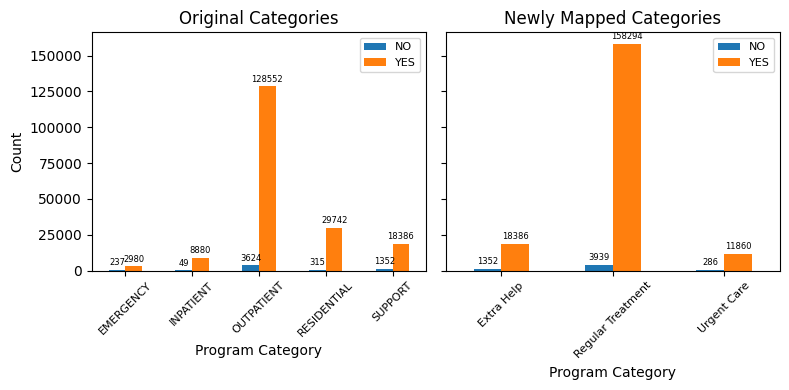

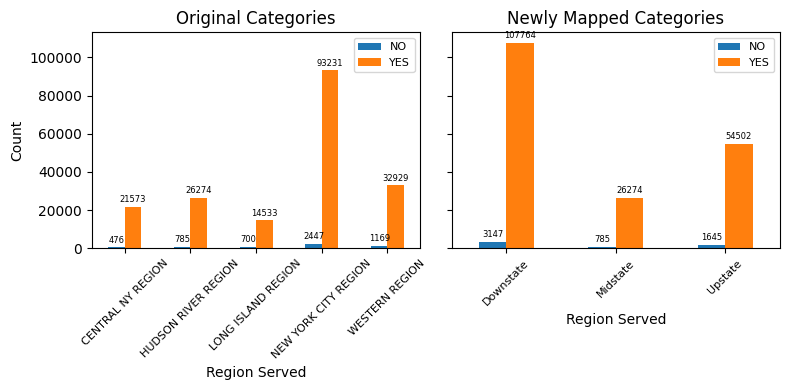

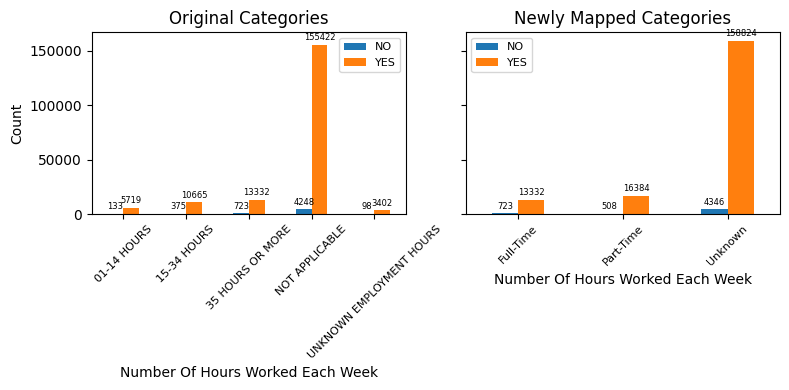

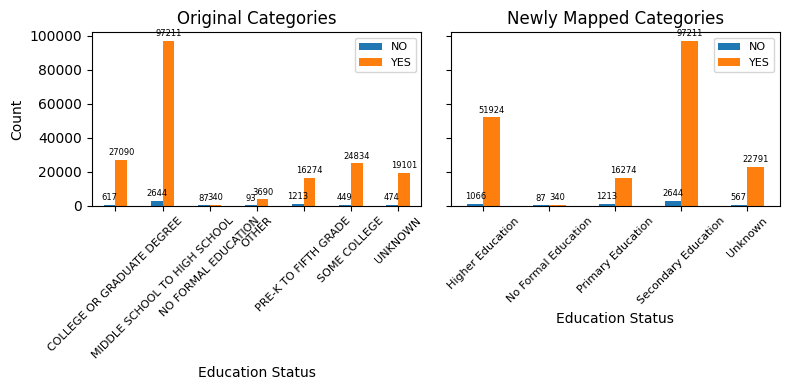

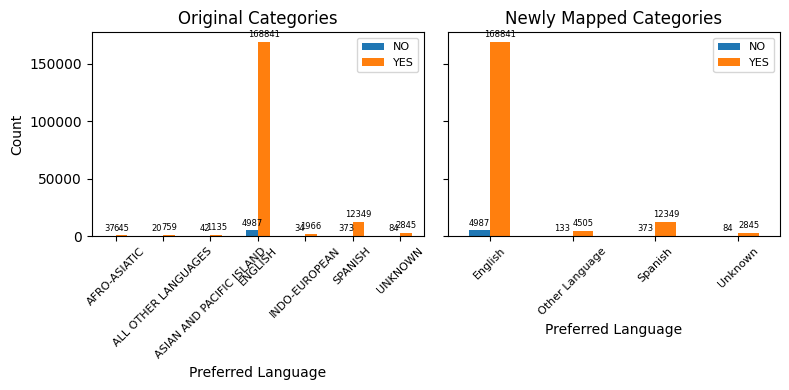

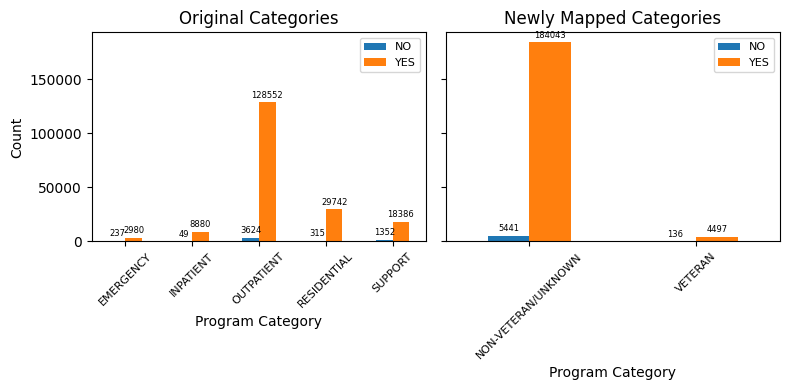

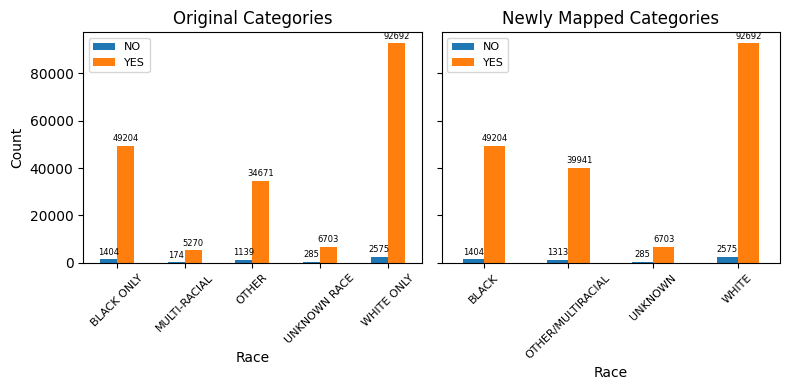

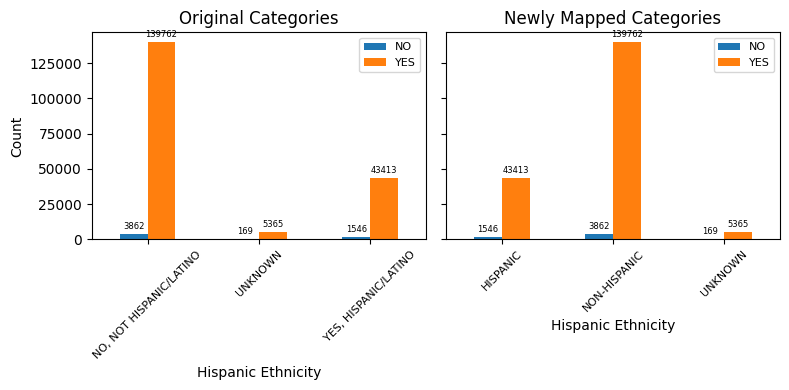

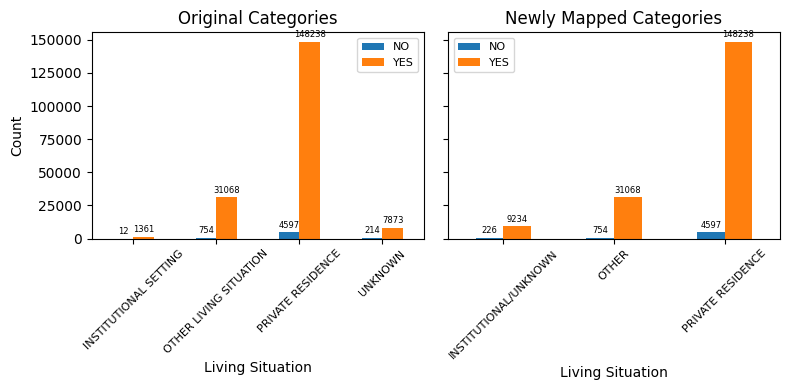

In [24]:
def plot_crosstabs(original_col, modifie_col):
    crosstab_original = pd.crosstab(df[original_col], df['Mental Illness'])
    crosstab_modified = pd.crosstab(df_modified[modifie_col], df_modified['Mental Illness'])

    fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
    crosstab_original.plot(kind='bar', ax=axes[0], title='Original Categories', legend=True)
    crosstab_modified.plot(kind='bar', ax=axes[1], title='Newly Mapped Categories')
    # Common settings
    for ax in axes:
        ax.set_xlabel(original_col)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45, labelsize=8)  # Tilt and reduce font size
        ax.legend(fontsize=8)  # Reduce legend size
        # Add data labels
        for container in ax.containers:
            ax.bar_label(container, fontsize=6, padding=2)

    plt.tight_layout()
    plt.show()


plot_crosstabs('Program Category', 'Program_Category')
plot_crosstabs('Region Served', 'Region_Served')    
plot_crosstabs('Number Of Hours Worked Each Week', 'Hours_Category')
plot_crosstabs('Education Status', 'Education_Category')
plot_crosstabs('Preferred Language', 'Language_Category')
plot_crosstabs('Program Category', 'Veteran_Status')
plot_crosstabs('Race', 'RACE')
plot_crosstabs('Hispanic Ethnicity', 'hispanic_ethnicity')
plot_crosstabs('Living Situation', 'Living_Situation')


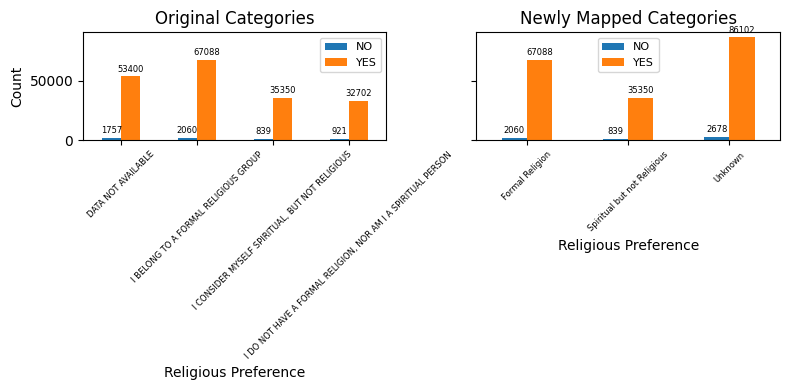

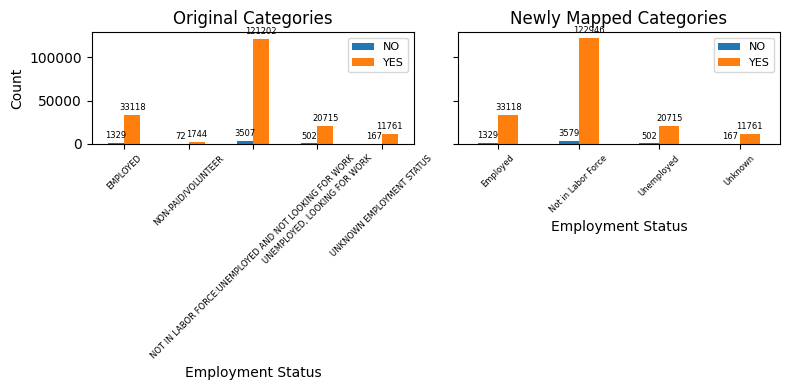

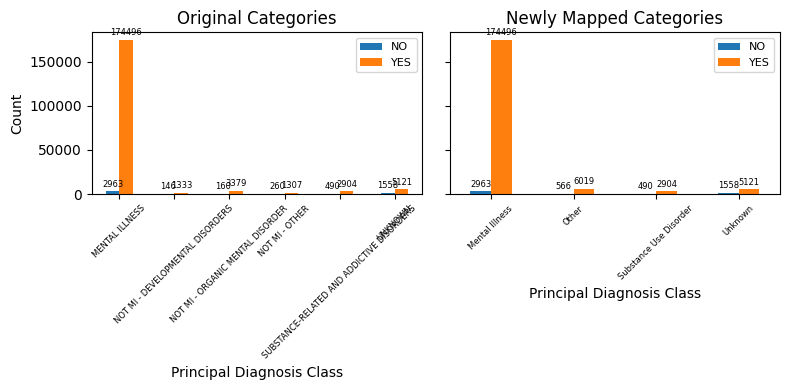

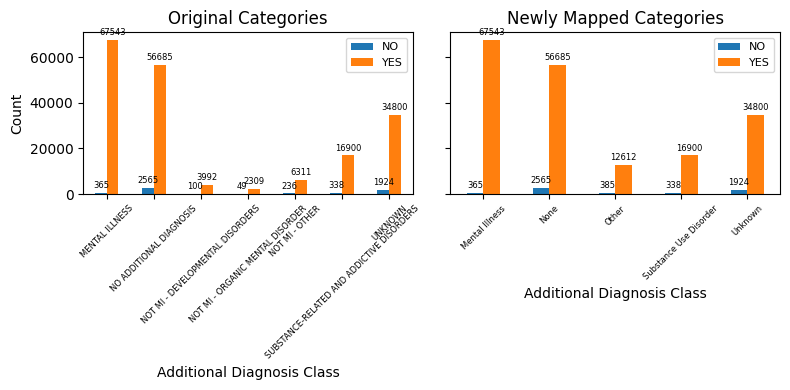

In [25]:
def plot_crosstabs2(original_col, modifie_col):
    crosstab_original = pd.crosstab(df[original_col], df['Mental Illness'])
    crosstab_modified = pd.crosstab(df_modified[modifie_col], df_modified['Mental Illness'])

    fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
    crosstab_original.plot(kind='bar', ax=axes[0], title='Original Categories', legend=True)
    crosstab_modified.plot(kind='bar', ax=axes[1], title='Newly Mapped Categories')
    # Common settings
    for ax in axes:
        ax.set_xlabel(original_col)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45, labelsize=6)  # Tilt and reduce font size
        ax.legend(fontsize=8)  # Reduce legend size
        # Add data labels
        for container in ax.containers:
            ax.bar_label(container, fontsize=6, padding=2)

    plt.tight_layout()
    plt.show()


plot_crosstabs2('Religious Preference', 'Religion_Category')
plot_crosstabs2('Employment Status', 'Employment_Status')    
plot_crosstabs2('Principal Diagnosis Class', 'Diagnosis_Category')
plot_crosstabs2('Additional Diagnosis Class', 'Additional_Diagnosis_Category')

In [26]:
df_modified.columns

Index(['Age Group', 'Hispanic Ethnicity', 'Race', 'Living Situation',
       'Household Composition', 'Veteran Status', 'Special Education Services',
       'Mental Illness', 'Intellectual Disability', 'Autism Spectrum',
       'Other Developmental Disability', 'Alcohol Related Disorder',
       'Drug Substance Disorder', 'Opioid Related Disorder',
       'Mobility Impairment Disorder', 'Hearing Impairment',
       'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
       'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack', 'Stroke',
       'Other Cardiac', 'Pulmonary Asthma', 'Alzheimer or Dementia',
       'Kidney Disease', 'Liver Disease', 'Endocrine Condition',
       'Neurological Condition', 'Traumatic Brain Injury', 'Joint Disease',
       'Cancer', 'Other Chronic Med Condition', 'No Chronic Med Condition',
       'Unknown Chronic Med Condition', 'Cannabis Recreational Use',
       'Cannabis Medicinal Use', 'Smokes', 'Received Smoking Medication',
       'Recei

In [27]:
# Creating one more column that combines information from 3 columns - 
def cultural_group(row):
    race = row['Race']
    lang = row['Language_Category']
    eth = row['Hispanic Ethnicity']
    
    if race == 'WHITE' and lang == 'English' and eth == 'NON-HISPANIC':
        return 'Majority US'
    elif eth == 'HISPANIC':
        return 'Hispanic'
    elif race == 'MULTI-RACIAL':
        return 'Multiracial'
    elif lang not in ['English', 'Unknown']:
        return 'Immigrant/Other Lang'
    else:
        return 'Unknown'

df_modified['Cultural Group'] = df_modified.apply(cultural_group, axis=1)

# Dropping columns as information is captured in new column
df_modified.drop( columns = ['Veteran Status', 'Hispanic Ethnicity',  'Race', 'Language_Category' , 'Living Situation'] , inplace=True) 

In [28]:
# Combining Diagnosis and Additional Diagnosis columns to create one final column that captures whole information
# We can have 1 feature with reduced cumulative categories
def diagnosis_summary(row):
    p = str(row['Diagnosis_Category']).strip().upper()
    a = str(row['Additional_Diagnosis_Category']).strip().upper()

    # Buckets for consistency
    def bucket(x):
        if x == 'MENTAL ILLNESS':
            return 'MI'
        if x == 'OTHER':
            return 'NOT_MI'
        if x in {'NONE', 'NO ADDITIONAL DIAGNOSIS'}:
            return 'NO_ADDL'
        if x == 'UNKNOWN':
            return 'UNKNOWN'
        return 'UNKNOWN'

    bp, ba = bucket(p), bucket(a)

    # ---- Decision rules (preserve your outcomes) ----
    # 1) MI group
    if bp == 'MI' and ba == 'MI':
        return 'MENTAL ILLNESS'
    if bp == 'MI' and ba == 'UNKNOWN':
        return 'MENTAL ILLNESS'

    # 2) No additional diagnosis cases
    if bp == 'MI' and ba == 'NO_ADDL':
        return 'NO ADDITIONAL DIAGNOSIS'
    if bp == 'UNKNOWN' and ba == 'NO_ADDL':
        return 'NO ADDITIONAL DIAGNOSIS'
    if bp in {'NO_ADDL', 'UNKNOWN'} and ba == 'NO_ADDL':
        return 'NO ADDITIONAL DIAGNOSIS'

    # 3) NOT MI consolidated cases
    if bp == 'NOT_MI' and ba in {'NO_ADDL', 'NOT_MI', 'UNKNOWN'}:
        return 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER'
    if bp == 'NOT_MI' and ba == 'MI':
        return 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER'
    if bp == 'NO_ADDL' and ba == 'NOT_MI':
        return 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER'

    # 4) Mixed MI vs NOT_MI (your rules included this special case)
    if bp == 'MI' and ba == 'NOT_MI':
        return 'NO DISORDER'

    # Fallback
    return 'UNKNOWN'

# Apply
df_modified['Diagnosis_Summary'] = df_modified.apply(diagnosis_summary, axis=1)

# Dropping columns as information is captured in new column
df_modified.drop( columns = [ 'Diagnosis_Category',  'Additional_Diagnosis_Category' ] , inplace=True) 
 

In [29]:
# Combining related developmental/mental disability flags to create one final column that captures whole information
# We can have 1 feature with reduced cumulative categories

def mental_disability_summary(row):
    # Related developmental/mental disability flags
    conds = [        'Intellectual Disability',        'Autism Spectrum',        'Other Developmental Disability'    ]
    # Normalize values
    vals = [str(row[c]).strip().upper() for c in conds]
    # Counts
    yes = vals.count("YES")
    no  = vals.count("NO")
    unk = vals.count("UNKNOWN")
    # Rules (preserve original outcomes)
    if yes > 0:
        return "INTELECTUAL/AUTISM/DEVELOP DISABILITY"
    if no == len(conds):
        return "NO DISABILITY"
    if no == len(conds) - 1 and unk == 1:
        return "NO DISABILITY"
    if unk == len(conds):
        return "UNKNOWN"
    return "UNKNOWN"

# Apply
df_modified["Mental_Disability_Summary"] = df_modified.apply(mental_disability_summary, axis=1)

# Dropping columns as information is captured in new column
df_modified.drop( columns = [ 'Intellectual Disability', 'Autism Spectrum', 'Other Developmental Disability' ] , inplace=True) 


In [30]:
# Combining related brain/chronic condition flags to create one final column that captures whole information
# We can have 1 feature with reduced cumulative categories 
def impairment_summary(row):
    # Impairment-related conditions
    conds = ['Mobility Impairment Disorder',  'Hearing Impairment','Visual Impairment',  'Speech Impairment'   ]
    # Normalize
    vals = [str(row[c]).strip().upper() for c in conds]
    # Counts
    yes = vals.count("YES")
    no  = vals.count("NO")
    unk = vals.count("UNKNOWN")
    # Rules
    if yes > 0:
        return "PHYSICAL IMPAIRMENT"
    if no == len(conds):
        return "NO PHYSICAL IMPAIRMENT"
    if no >= 2 and no + unk == len(conds):
        return "NO PHYSICAL IMPAIRMENT"
    if unk == len(conds):
        return "UNKNOWN"
    return "UNKNOWN"
# Apply
df_modified["Impairment_Summary"] = df_modified.apply(impairment_summary, axis=1)

# Dropping columns as information is captured in new column
df_modified.drop( columns = [  'Mobility Impairment Disorder',  'Hearing Impairment','Visual Impairment',  'Speech Impairment'  ] , inplace=True) 

In [31]:
# Combining related chronic condition flags to create one final column that captures whole information
# We can have 1 feature with reduced cumulative categories 
def chronicdisease_summary(row):
    # Chronic condition colu mns
    chronic_cols = [ 'Hyperlipidemia', 'High Blood Pressure', 'Diabetes', 'Obesity',  'Heart Attack', 'Stroke', 'Other Cardiac', 'Pulmonary Asthma',  'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
        'Endocrine Condition', 'Neurological Condition', 'Traumatic Brain Injury',   'Joint Disease', 'Cancer', 'Other Chronic Med Condition', 'Unknown Chronic Med Condition' ]
    # Special "No Chronic" flag
    special_col = 'No Chronic Med Condition'
    
    # Normalize values
    vals = [str(row[c]).strip().upper() for c in chronic_cols]
    special_val = str(row.get(special_col, "")).strip().upper()
    
    # Checks
    has_chronic = any(v in ("YES", "TRUE") for v in vals)
    no_chronic  = special_val in ("YES", "TRUE")
    all_unknown = all(v == "UNKNOWN" for v in vals + [special_val])

    # Rules
    if has_chronic:
        return "CHRONICAL MEDICAL CONDITION"
    if no_chronic:
        return "NO CHRONICAL MEDICAL CONDITION"
    if all_unknown:
        return "UNKNOWN"
    return "UNKNOWN"

# Apply
df_modified["Chronic_disease_Summary"] = df_modified.apply(chronicdisease_summary, axis=1)


In [32]:
# Combining related brain/chronic condition flags to create one final column that captures whole information
# We can have 1 feature with reduced cumulative categories

def cannabis_use_summary(row):
    # Cannabis use indicators
    conds = ['Cannabis Recreational Use', 'Cannabis Medicinal Use']
    
    # Normalize values
    vals = [str(row[c]).strip().upper() for c in conds]
    
    # Counts
    yes = vals.count("YES")
    no  = vals.count("NO")
    unk = vals.count("UNKNOWN")

    # Rules
    if yes > 0:
        return "Use Cannabis Medical/recreational"
    if no == len(conds):
        return "No use cannabis"
    if no == 1 and unk == 1:
        return "No use cannabis"
    if unk == len(conds):
        return "UNKNOWN"
    return "UNKNOWN"

# Apply
df_modified["Canabis_Usage_Summary"] = df_modified.apply(cannabis_use_summary, axis=1)

# Dropping columns as information is captured in new column
df_modified.drop( columns = [ 'Cannabis Recreational Use', 'Cannabis Medicinal Use'] , inplace=True) 


In [33]:
# Combining related smoking treatment flags to create one final column that captures whole information

def smoking_treatment_summary(row):
    # Smoking-related treatment indicators
    conds = ['Received Smoking Medication', 'Received Smoking Counseling']
    
    # Normalize values
    vals = [str(row[c]).strip().upper() for c in conds]
    # Counts
    yes = vals.count("YES")
    no  = vals.count("NO")
    unk = vals.count("UNKNOWN")
    # Rules
    if yes > 0:
        return "Received Smoking Medication/counseling"
    if no == len(conds):
        return "No Received Smoking Medication/counseling"
    if no == 1 and unk == 1:
        return "No Received Smoking Medication/counseling"
    if unk == len(conds):
        return "UNKNOWN"
    return "UNKNOWN"

# Apply
df_modified["Smoking treatment_summary"] = df_modified.apply(smoking_treatment_summary, axis=1)


# Dropping columns as information is captured in new column
df_modified.drop( columns = [ 'Received Smoking Medication', 'Received Smoking Counseling' ] , inplace=True) 

In [34]:
# Combining related developmental/mental disability flags to create one final column that captures whole information
 
def service_drug_alcohol_Summary(row):
    # Service-related indicators
    conds = ['Alcohol 12m Service', 'Opioid 12m Service', 'Drug/Substance 12m Service']
    # Normalize
    vals = [str(row[c]).strip().upper() for c in conds]
    # Counts
    yes = vals.count("YES")
    no  = vals.count("NO")
    unk = vals.count("UNKNOWN")
    # Rules
    if yes > 0:
        return "SERVICE ALCOHOL DRUG USE"
    if no == len(conds):
        return "NO SERVICE ALCOHOL DRUG USE"
    if no == len(conds) - 1 and unk == 1:
        return "NO SERVICE ALCOHOL DRUG USE"
    if unk == len(conds):
        return "UNKNOWN"
    return "UNKNOWN"
# Apply
df_modified["Service_drug_alcohol_Summary"] = df_modified.apply(service_drug_alcohol_Summary, axis=1)

# Dropping columns as information is captured in new column
df_modified.drop( columns = [ 'Alcohol 12m Service', 'Opioid 12m Service', 'Drug/Substance 12m Service' ] , inplace=True) 


In [35]:
# Combining related chronic condition flags to create one final column that captures whole information

def other_test_chronic_group(row):
    # Conditions to check
    conds = ['Hyperlipidemia', 'High Blood Pressure', 'Obesity']
    
    # Normalize values
    vals = [str(row[c]).strip().upper() for c in conds]
    
    # Counts
    yes = vals.count("YES")
    no  = vals.count("NO")
    unk = vals.count("UNKNOWN")

    # Rules
    if yes > 0:
        return "YES, HYPERLIPIDEMIA/HIGHBLOODPRESSURE/OBESITY"
    if no == len(conds):
        return "NO, HYPERLIPIDEMIA/HIGHBLOODPRESSURE/OBESITY"
    if no == len(conds) - 1 and unk == 1:
        return "NO, HYPERLIPIDEMIA/HIGHBLOODPRESSURE/OBESITY"
    if unk == len(conds):
        return "UNKNOWN"
    return "UNKNOWN"

# Apply
df_modified["Other_testchronic_group_Summary"] = df_modified.apply(other_test_chronic_group, axis=1)

# Dropping columns as information is captured in new column
df_modified.drop( columns = [ 'Hyperlipidemia', 'High Blood Pressure', 'Obesity' ] , inplace=True) 


In [36]:
# Combining related chronic condition flags to create one final column that captures whole information

def heart_chronic_group(row):
    # Cardiac-related conditions
    conds = ['Heart Attack', 'Other Cardiac', 'Stroke']
    
    # Normalize values
    vals = [str(row[c]).strip().upper() for c in conds]
    
    # Counts
    yes = vals.count("YES")
    no  = vals.count("NO")
    unk = vals.count("UNKNOWN")

    # Rules (same outcomes as your original)
    if yes > 0:
        return "YES, HEART CHRONIC ILLNESS"
    if no == len(conds):
        return "NO, HEART CHRONIC ILLNESS"
    if no == len(conds) - 1 and unk == 1:
        return "NO, HEART CHRONIC ILLNESS"
    if unk == len(conds):
        return "UNKNOWN"
    return "UNKNOWN"

# Apply
df_modified["Heartchronic_Summary"] = df_modified.apply(heart_chronic_group, axis=1)

# Dropping columns as information is captured in new column
df_modified.drop( columns = [    'Heart Attack', 'Other Cardiac', 'Stroke' ] , inplace=True) 

In [37]:
# Combining related disorder flags to create one final column that captures whole information
def disorder_group(row):
    # Normalize values
    vals = [str(row[c]).strip().upper() for c in [
        'Alcohol Related Disorder',  'Drug Substance Disorder',    'Opioid Related Disorder'    ]]
    # Rule 1: any YES - disorder
    if "YES" in vals:
        return "ALCOHOL/DRUG DISORDER"
    # Rule 2: all NO - no disorder
    if all(v == "NO" for v in vals):
        return "NO DISORDER"
    # Rule 3: two NOs + one UNKNOWN - still no disorder
    if vals.count("NO") == 2 and vals.count("UNKNOWN") == 1:
        return "NO DISORDER"
    # Rule 4: all UNKNOWN - unknown
    if all(v == "UNKNOWN" for v in vals):
        return "UNKNOWN"
    # Default case
    return "UNKNOWN"

# Apply
df_modified['Disorder_summary'] = df_modified.apply(disorder_group, axis=1)

# Dropping columns as information is captured in new column
df_modified.drop( columns = [     'Alcohol Related Disorder',        'Drug Substance Disorder',        'Opioid Related Disorder' ] , inplace=True) 

In [38]:
# Combining related chronic condition flags to create one final column that captures whole information
def other_chron_group(row):
    # Pick up all relevant chronic condition columns
    conds = [  'Diabetes','Pulmonary Asthma','Kidney Disease','Liver Disease','Endocrine Condition', 'Joint Disease',
               'Cancer','Other Chronic Med Condition', 'Unknown Chronic Med Condition']
    # Normalize values
    vals = [str(row[c]).strip().upper() for c in conds]
    # Counts
    yes = sum(v in ["YES", "TRUE"] for v in vals)
    no = sum(v in ["NO", "FALSE"] for v in vals)
    unk = vals.count("UNKNOWN")
    # Rules
    if yes >= 1:
        return "YES, CHRONIC ILLNESS"
    if no == len(conds):
        return "NO, CHRONIC ILLNESS"
    if no == len(conds) - 1 and unk == 1:
        return "NO, CHRONIC ILLNESS"
    if unk == len(conds):
        return "UNKNOWN"
    return "UNKNOWN"

# Apply
df_modified["Other_Chronic_Illness_Summmary"] = df_modified.apply(other_chron_group, axis=1)
# Dropping columns as information is captured in new column
df_modified.drop( columns = ['Diabetes','Pulmonary Asthma','Kidney Disease','Liver Disease','Endocrine Condition', 'Joint Disease',  
                             'Cancer','Other Chronic Med Condition', 'Unknown Chronic Med Condition' ] , inplace=True) 

In [39]:
# Combining related brain/chronic condition flags to create one final column that captures whole information
def brain_chronic_summary(row):
    # Relevant brain-related chronic conditions
    conds = ['Alzheimer or Dementia', 'Neurological Condition','Traumatic Brain Injury' ]
    # Normalize values
    vals = [str(row[c]).strip().upper() for c in conds]
    # Counts
    yes = vals.count("YES")
    no = vals.count("NO")
    unk = vals.count("UNKNOWN")
    # Rules
    if yes > 0:
        return "YES, BRAIN CHRONIC ILLNESS"
    if no == len(conds):
        return "NO, BRAIN CHRONIC ILLNESS"
    if no == len(conds) - 1 and unk == 1:
        return "NO, BRAIN CHRONIC ILLNESS"
    if unk == len(conds):
        return "UNKNOWN"
    return "UNKNOWN"

# Apply
df_modified["Brainchronic_Summary"] = df_modified.apply(brain_chronic_summary, axis=1)

# Dropping columns as information is captured in new column
df_modified.drop( columns = ['Alzheimer or Dementia', 'Neurological Condition','Traumatic Brain Injury' ] , inplace=True) 


In [40]:
# Processing Insurance related columns to create new features
# 'Medicaid and Medicare Insurance', 'No Insurance', 'Medicaid Insurance', 'Medicaid Managed Insurance', 'Medicare Insurance', 'Private Insurance', 'Child Health Plus Insurance', 'Other Insurance'    
# Creating new features based on insurance columns

# 1. Insured_or_Not - Yes/No - if any of the insurance columns
def check_public_insurance(row):
    if row['Medicaid Insurance'] == 'YES' or row['Medicare Insurance'] == 'YES' or row['Child Health Plus Insurance'] == 'YES':
        return 'Yes'
    return 'No'
# 2. Has_Public_Insurance - Yes/No - if any of the public insurance columns
def check_private_other_insurance(row):
    if row['Private Insurance'] == 'YES' or row['Other Insurance'] == 'YES' or row['No Insurance'] == 'YES':
        return 'Yes'
    return 'No'
# 3. Confirmed_Medicaid_Managed - Yes/No - if 'Medicaid Managed Insurance' is 'YES'
def check_medicaid_managed(row):
    return 'Yes' if row['Medicaid Managed Insurance'] == 'YES' else 'No'

# 4. check_any_insurance - Yes/No - if any of the insurance columns is 'YES'
def check_any_insurance(row):
    cols = [        'Medicaid and Medicare Insurance',        'No Insurance',        'Medicaid Insurance',        'Medicaid Managed Insurance',
        'Medicare Insurance',        'Private Insurance',        'Child Health Plus Insurance',        'Other Insurance'    ]
    return 'Yes' if any(row[c] == 'YES' for c in cols) else 'No'

# Apply
df_modified['Insured_or_Not'] = df_modified.apply(check_any_insurance, axis=1)
df_modified['Has_Public_Insurance'] = df_modified.apply(check_public_insurance, axis=1)
df_modified['Has_Private_or_Other_Insurance'] = df_modified.apply(check_private_other_insurance, axis=1)
df_modified['Confirmed_Medicaid_Managed'] = df_modified.apply(check_medicaid_managed, axis=1)

# Dropping columns as information is captured in new column
df_modified.drop( columns = ['Medicaid and Medicare Insurance',        'No Insurance',        'Medicaid Insurance',        'Medicaid Managed Insurance',
        'Medicare Insurance',        'Private Insurance',        'Child Health Plus Insurance',        'Other Insurance'  ] , inplace=True) 


In [41]:
# Mapping detailed Gender + Orientation combos to broader sub-groups - too many categories after enconding
gender_orientation_map = {
    # Cisgender Men
    'Man — Straight': 'Cisgender Man',
    'Man — Gay/Lesbian': 'Cisgender Man',
    'Man — Bisexual': 'Cisgender Man',
    'Man — Other': 'Cisgender Man',
    'Man — Unknown': 'Cisgender Man',

    # Cisgender Women
    'Woman — Straight': 'Cisgender Woman',
    'Woman — Gay/Lesbian': 'Cisgender Woman',
    'Woman — Bisexual': 'Cisgender Woman',
    'Woman — Other': 'Cisgender Woman',
    'Woman — Unknown': 'Cisgender Woman',

    # Transgender Women
    'Trans Woman — Straight': 'Transgender Woman',
    'Trans Woman — Gay/Lesbian': 'Transgender Woman',
    'Trans Woman — Bisexual': 'Transgender Woman',
    'Trans Woman — Other': 'Transgender Woman',
    'Trans Woman — Unknown': 'Transgender Woman',

    # Transgender Men
    'Trans Man — Straight': 'Transgender Man',
    'Trans Man — Gay/Lesbian': 'Transgender Man',
    'Trans Man — Bisexual': 'Transgender Man',
    'Trans Man — Other': 'Transgender Man',
    'Trans Man — Unknown': 'Transgender Man',

    # Generic Transgender (unspecified)
    'Transgender — Straight': 'Transgender (Unspecified)',
    'Transgender — Bisexual': 'Transgender (Unspecified)',
    'Transgender — Other': 'Transgender (Unspecified)',
    'Transgender — Unknown': 'Transgender (Unspecified)',

    # Unknown
    'Unknown — Straight': 'Unknown',
    'Unknown — Gay/Lesbian': 'Unknown',
    'Unknown — Bisexual': 'Unknown',
    'Unknown — Other': 'Unknown',
    'Unknown — Unknown': 'Unknown'
}

df_modified['Gender_Orientation_Grouped'] = df_modified['Gender_Identity_Orientation'].replace(gender_orientation_map)

# Drop the original detailed column
df_modified = df_modified.drop(columns=['Gender_Identity_Orientation'])

# Rename the grouped column to the original column name
df_modified = df_modified.rename(columns={'Gender_Orientation_Grouped': 'Gender_Identity_Orientation'})


In [42]:
df_modified['Veteran_Status'] = np.where(
    (df_modified['Veterans Disability Benefits'] == 'YES') | (df_modified['Veterans Cash Assistance'] == 'YES'),
    'VETERAN',
    'NON-VETERAN/UNKNOWN'
)

# Drop the original columns
df_modified = df_modified.drop(columns=['Veterans Disability Benefits', 'Veterans Cash Assistance'])

In [43]:
# Merge SSI, SSDI, Public Assistance, and Other Cash Benefits
def cash_assistance_group(row):
    cols = [
        'SSI Cash Assistance',
        'SSDI Cash Assistance',
        'Public Assistance Cash Program',
        'Other Cash Benefits'
    ]
    vals = [str(row[c]).strip().upper() for c in cols]
    
    if "YES" in vals:
        return "Yes"
    return "No/Unknown"

# Apply to create new column
df_modified['Receiving Cash Assistance'] = df_modified.apply(cash_assistance_group, axis=1)

df_modified.drop(columns=['SSI Cash Assistance','SSDI Cash Assistance',
                          'Public Assistance Cash Program','Other Cash Benefits'], inplace=True)



In [44]:
len(df_modified.columns)
# 76 columns reduced to 38 columns in feature engineering and grouping.
# Lets move forward to feature selection and modeling in next steps in new notebook

38

In [45]:
for i in df_modified.columns:
    ctab = pd.crosstab( df['Mental Illness'], df_modified[i])
    print(ctab)

Age Group        ADULT  CHILD  UNKNOWN
Mental Illness                        
NO                2936   2632        9
YES             148046  40433       61
Household Composition  COHABITATES WITH OTHERS  LIVES ALONE  NOT APPLICABLE  \
Mental Illness                                                                
NO                                        3979          684             795   
YES                                     107205        38490           33761   

Household Composition  UNKNOWN  
Mental Illness                  
NO                         119  
YES                       9084  
Special Education Services     NO  NOT APPLICABLE  UNKNOWN    YES
Mental Illness                                                   
NO                           1688            3094      217    578
YES                         19336          148443     4223  16538
Mental Illness    NO     YES
Mental Illness              
NO              5577       0
YES                0  188540
No Chronic Med 

In [46]:
df_modified.head()

,Age Group,Household Composition,Special Education Services,Mental Illness,No Chronic Med Condition,Smokes,Serious Mental Illness,Unknown Insurance Coverage,Criminal Justice Status,Program_Category,...,Heartchronic_Summary,Disorder_summary,Other_Chronic_Illness_Summmary,Brainchronic_Summary,Insured_or_Not,Has_Public_Insurance,Has_Private_or_Other_Insurance,Confirmed_Medicaid_Managed,Gender_Identity_Orientation,Receiving Cash Assistance
0,ADULT,COHABITATES WITH OTHERS,NOT APPLICABLE,YES,YES,NO,YES,NO,NO,Regular Treatment,...,"NO, HEART CHRONIC ILLNESS",NO DISORDER,"NO, CHRONIC ILLNESS","NO, BRAIN CHRONIC ILLNESS",Yes,Yes,No,Yes,Cisgender Man,No/Unknown
1,ADULT,LIVES ALONE,NOT APPLICABLE,YES,YES,NO,YES,NO,NO,Regular Treatment,...,"NO, HEART CHRONIC ILLNESS",NO DISORDER,"NO, CHRONIC ILLNESS","NO, BRAIN CHRONIC ILLNESS",Yes,Yes,No,Yes,Cisgender Man,No/Unknown
2,ADULT,COHABITATES WITH OTHERS,NOT APPLICABLE,YES,YES,YES,YES,NO,NO,Regular Treatment,...,"NO, HEART CHRONIC ILLNESS",ALCOHOL/DRUG DISORDER,"NO, CHRONIC ILLNESS","NO, BRAIN CHRONIC ILLNESS",Yes,Yes,No,Yes,Cisgender Man,No/Unknown
3,ADULT,NOT APPLICABLE,NOT APPLICABLE,YES,YES,YES,YES,NO,NO,Regular Treatment,...,"NO, HEART CHRONIC ILLNESS",ALCOHOL/DRUG DISORDER,"NO, CHRONIC ILLNESS","NO, BRAIN CHRONIC ILLNESS",Yes,Yes,No,No,Cisgender Man,Yes
4,ADULT,COHABITATES WITH OTHERS,NOT APPLICABLE,YES,NO,YES,YES,NO,NO,Regular Treatment,...,"NO, HEART CHRONIC ILLNESS",ALCOHOL/DRUG DISORDER,"NO, CHRONIC ILLNESS","NO, BRAIN CHRONIC ILLNESS",Yes,Yes,No,Yes,Cisgender Woman,Yes


In [47]:
# # Saving data to csv files for further 
df_modified.to_csv('dataset_after_feature_engineering.csv', index=False )

In [48]:
# # # Splittting df into 3 parts for better handling of columns
# # # Added "Mental Illness" column at the end in all dataframes as it is target variable in all 3 parts to check correlation with other columns


# # # Contains 22 columns 
# df_part1_muti_category = df_modified['Program_Category', 'Region_Served', 'Religion_Category', 'Employment_Status', 'Hours_Category','Education_Category', 'Additional_Diagnosis_Category',
# 'Language_Category', 'Diagnosis_Category',  'Gender_Identity_Orientation' , 'Age Group', 'Hispanic Ethnicity', 'Race', 'Living Situation',
#  'Household Composition', 'Veteran Status', 'Special Education Services',  'Intellectual Disability', 'Autism Spectrum',
# 'Other Developmental Disability', 'Alcohol Related Disorder',  'Drug Substance Disorder', 'Mental Illness']

# # Contains  columns 
# df_part2_medical = df_modified[["Opioid Related Disorder",	"Mobility Impairment Disorder",	"Hearing Impairment",	"Visual Impairment",	"Speech Impairment",	"Hyperlipidemia",	
# "High Blood Pressure",	"Diabetes",	"Obesity",	"Intellectual Disability",	"Autism Spectrum",	"Other Developmental Disability",	"Alcohol Related Disorder",	
# "Drug Substance Disorder",	"Stroke",	"Other Cardiac",	"Pulmonary Asthma",	"Alzheimer or Dementia",	"Kidney Disease",	"Liver Disease",	"Endocrine Condition",	
# "Neurological Condition",	"Traumatic Brain Injury",	"Joint Disease",	"Cancer",	"Heart Attack",	"No Chronic Med Condition",	"Other Chronic Med Condition" , "Mental Illness"]]

# # Contains adhoc columns
# df_part3_others = df_modified[["Cannabis Recreational Use",	"Cannabis Medicinal Use",	"Smokes",	"Received Smoking Medication",	"Received Smoking Counseling",	"Serious Mental Illness",
# "Alcohol 12m Service",	"Opioid 12m Service",	"Drug/Substance 12m Service",	"SSI Cash Assistance",	"SSDI Cash Assistance",	"Veterans Disability Benefits", "Veteran Status",	
# "Veterans Cash Assistance",	"Public Assistance Cash Program",	"Other Cash Benefits",	"Medicaid and Medicare Insurance",	"No Insurance",	"Medicaid Insurance",
# "Medicare Insurance",	"Private Insurance",	"Child Health Plus Insurance",	"Other Insurance",	"Criminal Justice Status" , "Mental Illness"]]

# # Saving data to csv files for further analysis
# # df_part1_muti_category.to_csv('df_part1_muti_category.csv', index=False )
# # df_part2_medical.to_csv('df_part2_medical.csv', index=False )
# # df_part3_others.to_csv('df_part3_others.csv', index=False )


# # Encode target column Yes with ! and No with 0
# df['Mental Illness'] = df['Mental Illness'].map({'YES': 1, 'NO': 0})

# # Checking distribution
# df['Mental Illness'].value_counts(normalize=True)

# # Visualizing target variable distribution
# counts = df['Mental Illness'].value_counts()
# labels = ['No Mental Illness', 'Mental Illness']
# plt.figure(figsize=(3, 2))
# plt.bar(labels, counts, color=['green', 'red'])
# plt.title("Target Distribution")
# plt.ylabel("Number of Patients")
# plt.show()

# # There is a class imbalance in target variable, with 97.1%% of patients having no mental illness and 2.87% having mental illness

